### Install and import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

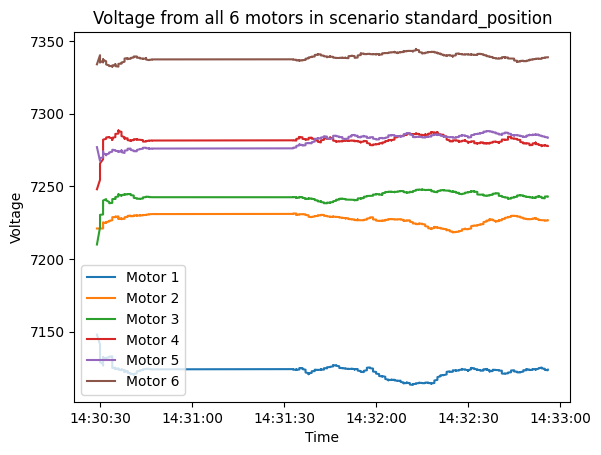

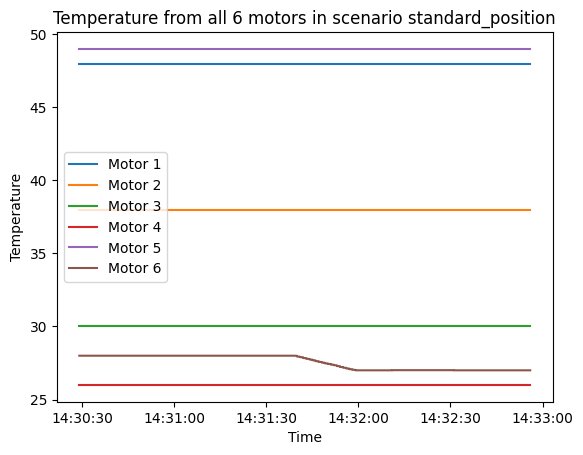

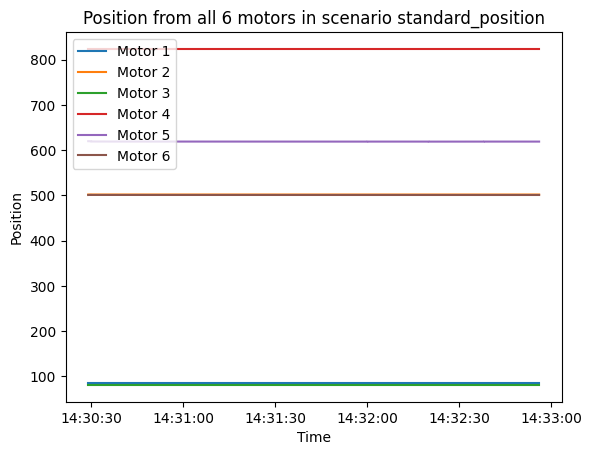

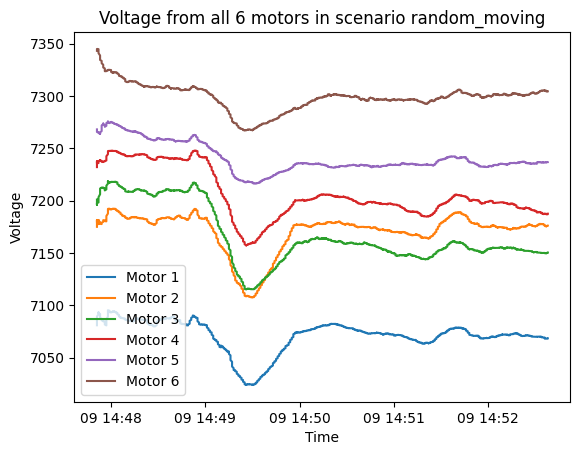

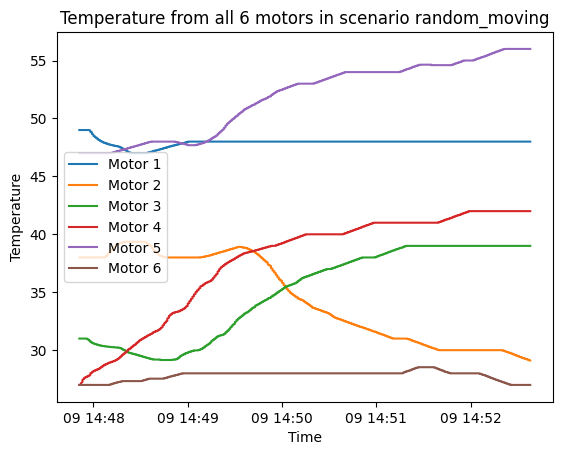

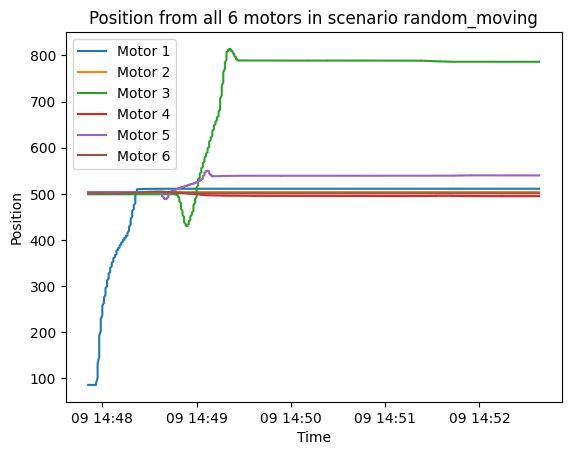

In [50]:
# Read the csv files and extract the data for all 6 motors
chosen_features = ['voltage', 'temperature', 'position']

def plot_smoothed_data(features,scenario,time,window_median,window_mean):
    path = f'collected_data/{scenario}/{time}'
    motor_df = []
    for feature in features:
        plt.figure()
        for i in range(1, 7):
            motor_df = pd.read_csv(f'{path}_data_motor_{i}.csv')
            motor_df['time'] = pd.to_datetime(motor_df['time'])
            motor_df[f'{feature}_smooth'] = motor_df[feature].rolling(window=window_median, min_periods=1).median()
            motor_df[f'{feature}_smooth'] = motor_df[f'{feature}_smooth'].rolling(window=window_mean, min_periods=1).mean()
            plt.plot(motor_df['time'], motor_df[f'{feature}_smooth'], label=f'Motor {i}')
        plt.xlabel('Time')
        plt.ylabel(feature.capitalize())
        plt.title(f'{feature.capitalize()} from all 6 motors in scenario {scenario}')
        plt.legend()
        plt.show()

plot_smoothed_data(features = chosen_features, scenario = 'standard_position', time = '2023_11_09_14-30', window_median=5, window_mean=100)
plot_smoothed_data(features = chosen_features, scenario = 'random_moving', time = '2023_11_09_14-47', window_median=5, window_mean=100)